# Roof Classification 
#### This program is performed in Google Colab.We have clearly explained how to load our own dataset into colab. 

In [0]:
import os
os.getcwd()

'/content'

In [0]:
os.mkdir('roof')
print('DONE')

DONE


In [0]:
os.listdir('/content')

['datalab', '.cache', '.ipython', '.config', '.local', '.forever', 'roof']

In [0]:
os.listdir('/content/roof')

[]

In [0]:
os.chdir('roof')

In [0]:
os.getcwd()

'/content/roof'

In [0]:
from google.colab import files
uploaded = files.upload()

Saving rootfop-detection.zip to rootfop-detection.zip


In [0]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file rootfop-detection.zip


In [0]:
import zipfile
path_to_zip_file = 'rootfop-detection.zip'
directory_to_extract_to = ''
zip_ref = zipfile.ZipFile(path_to_zip_file,'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()
print("Done")
                

Done


In [0]:
data_dir_list = os.listdir('/content/roof')
print(data_dir_list)

['labels.csv', 'weights_best.hdf5', 'weights.hdf5', 'model.hdf5', 'rooftop_detection.py', 'rootfop-detection.zip', '.ipynb_checkpoints', 'roof.ipynb', 'images']


In [0]:
#DELETING ZIP FILES
#zipped_file = '/content/roof/rootfop-detection.zip'
#with zipfile.ZipFile(zipped_file) as zip_file:
    #for member in zip_file.namelist():
        #filename = os.path.basename(member)
        #if not filename:
            #continue
        #source = zip_file.open(member)
    #source.close()

#os.remove(zipped_file)
#print("DONE")

## Import the required Libraries

In [0]:
import glob 
import os
from os.path import basename
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf


import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from keras.callbacks import ModelCheckpoint
from sklearn.cross_validation import train_test_split
print("DONE")

DONE


## Load the dataet

In [0]:
path = "//content/roof//"
labels= pd.read_csv(path +"labels.csv", delimiter=",",header = None) #load labels


#load rooftop mage and  resize
L=[]
train=np.array([])
images=glob.glob(path +"images"+"/*.*") #importation de images
for i in range(0,len(images)):
        im = Image.open(path +"images//"+labels.iloc[i][0]+".jpg")
        im_rz=im.resize((224,224), Image.ANTIALIAS)
        #im_rz.save(path+"//resized//"+basename(images[i]), 'JPEG',quality=95,optimize=True) #optionally if you want to save rezized images
        L.append(np.array(im_rz))                         
data=np.array(L)
print("DONE")

DONE


## Visualising dataset 

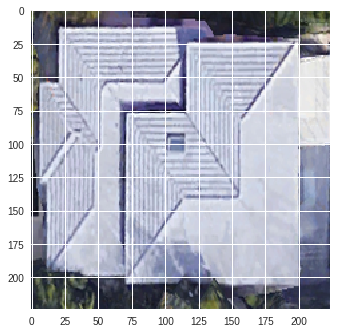

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

## Pre Processing

In [0]:
#transformation of labels into categorial variables to be interpreted by keras
y=pd.get_dummies(labels.iloc[:,1])

#seperate data into training set and test set
x_train, x_test, y_train, y_test  = train_test_split(data,y, train_size=0.8)


batch_size = 128
nb_classes = 4
epochs = 25

print("DONE")

DONE


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train=np.array(y_train).astype('float32')
y_test=np.array(y_test).astype('float32')
x_train /= 255
x_test /= 255
print("DONE")

DONE


## Build the Model 

In [0]:
# start of architecture Convolutional neural network
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(110, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(84, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(84, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
print("DONE")

DONE


In [0]:
#model.summary()

## Compile the Model

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-7)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])  

print("DONE")

DONE


## Setting the Checkpoint

In [0]:
 
filepath=path+"weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print("DONE")

DONE


## Data Augmentation

In [0]:

data_generation = ImageDataGenerator(
    rotation_range=7,  
    width_shift_range=0.10,  
    height_shift_range=0.10, 
    horizontal_flip=True,  
    vertical_flip=True)  
data_generation.fit(x_train)
print("DONE")

DONE


## Fit the Model

In [0]:
model_param=model.fit_generator(data_generation.flow(x_train, y_train,batch_size=batch_size),
                                steps_per_epoch=x_train.shape[0] // batch_size,
                                epochs=epochs,
                                validation_data=(x_test, y_test), callbacks=callbacks_list)

Epoch 1/25
18/18 [==============================] - 5s 301ms/step - loss: 1.3886 - acc: 0.2695 - val_loss: 1.3863 - val_acc: 0.2533
Epoch 2/25
18/18 [==============================] - 5s 261ms/step - loss: 1.4611 - acc: 0.3036 - val_loss: 1.3404 - val_acc: 0.3100
Epoch 3/25
18/18 [==============================] - 5s 258ms/step - loss: 1.2858 - acc: 0.3988 - val_loss: 1.2795 - val_acc: 0.4150
Epoch 4/25
18/18 [==============================] - 5s 260ms/step - loss: 1.2571 - acc: 0.4499 - val_loss: 1.1462 - val_acc: 0.4717
Epoch 5/25
18/18 [==============================] - 5s 255ms/step - loss: 1.2024 - acc: 0.4668 - val_loss: 1.0388 - val_acc: 0.6100
Epoch 6/25
18/18 [==============================] - 5s 255ms/step - loss: 1.1706 - acc: 0.4878 - val_loss: 1.0958 - val_acc: 0.5817
Epoch 7/25
18/18 [==============================] - 5s 253ms/step - loss: 1.1261 - acc: 0.5311 - val_loss: 0.9424 - val_acc: 0.6333
Epoch 8/25
18/18 [==============================] - 5s 254ms/step - loss: 1.

## Confusion Matrix

In [0]:
#show accuracy and confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=np.argmax(model.predict(x_test),1)
cm=confusion_matrix(np.argmax(y_test,1), y_pred)
print("confusion matrix")
print(cm)
print("accuracy")
print(np.sum(np.diag(cm))/np.sum(cm))

confusion matrix
[[126  10  16   0]
 [  5 118  27   0]
 [  1   8 141   0]
 [ 38  53  16  41]]
accuracy
0.71


### Plotting the Graph
1) Training accuracy- testing accuracy
2) Training loss-Testing loss 

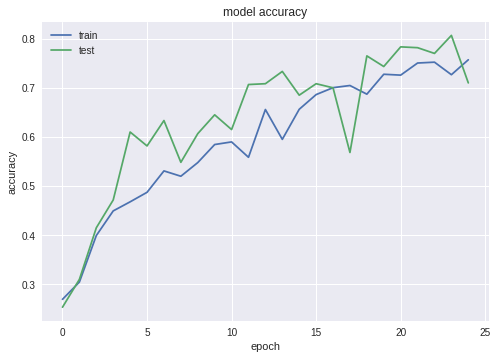

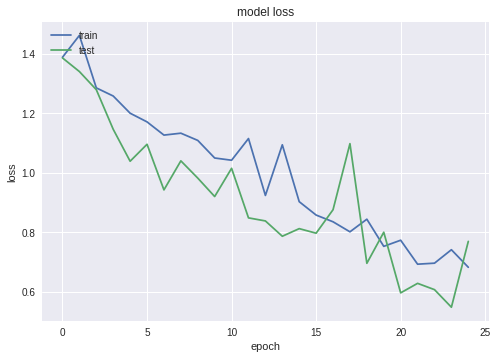

In [0]:
 # summarize history for accuracy   
import matplotlib.pyplot as plt    

plt.plot( model_param.history['acc'])
plt.plot(model_param.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(model_param.history['loss'])
plt.plot(model_param.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Prediction

In [0]:
model.save('rooftop.model')

In [0]:
new_model = tf.keras.models.load_model('rooftop.model')

In [0]:
predictions = new_model.predict(x_test)

In [0]:
print(predictions)

[[1.0325006e-01 1.1931531e-01 1.2014461e-01 6.5729004e-01]
 [1.8339592e-04 9.9828821e-01 2.8151768e-04 1.2468133e-03]
 [1.7058918e-02 5.6736737e-02 9.0335625e-01 2.2847993e-02]
 ...
 [7.5062320e-02 2.8406712e-01 5.7164860e-01 6.9221996e-02]
 [8.9697831e-04 9.9303365e-01 7.0338260e-04 5.3660725e-03]
 [7.4276123e-03 9.2932951e-01 4.0818837e-02 2.2424025e-02]]


In [0]:
import numpy as np
print(np.argmax(predictions[0]))

3


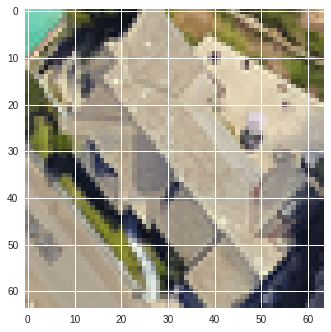

In [0]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [0]:
import numpy as np
print(np.argmax(predictions[1]))

1


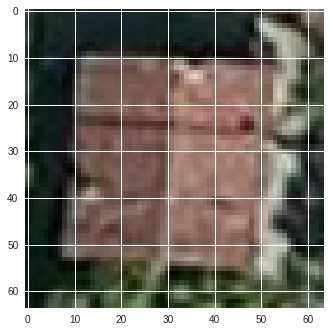

In [0]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()